## John Lehne
## CA05

In [2]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read data using URL
url = 'https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv' 
data = pd.read_csv(url, encoding = "ISO-8859-1")

#making sure data was read correctly
data.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


## Data Quality Analysis

In [4]:
# Number of total rows and columns
data.shape

(3242, 17)

In [5]:
# Range, column, number of non-null objects, data type, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [6]:
# Number of null values for each column
data.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [7]:
# Descriptive statistics for the dataset
data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


## Splitting Data into Train and Test

In [8]:
# importing scikit.learn to use test_train_split function
from sklearn.model_selection import train_test_split

In [9]:
# isolating the label data that will be used to train and test model
y_data = data['cvd_4types']

# isolating the feature data that will be used to train and test model
x_data = data.iloc[ : , 1: ]

# Splitting that data into test and train datasets
x_train, x_test = train_test_split(x_data, test_size = 0.3, random_state = 19)
# Doing the same split for y_labels
y_train, y_test = train_test_split(y_data, test_size = 0.3, random_state = 19)

# Seeing structure of test and train data
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (2269, 16)
x_test: (973, 16)
y_train: (2269,)
y_test: (973,)


## Logistic Regression Modeling

In [10]:
# importing necessary packages from Sklearn
from sklearn import linear_model

In [11]:
# train the model
lrm = linear_model.LogisticRegression(C = 1e50, solver = 'newton-cg')

# fitting the model
lrm.fit(x_train, y_train)

# testing the model
y_pred = lrm.predict(x_test)

In [32]:
# Performance of the model
# importing necessary packages
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics

#AUC Score
auc_score = roc_auc_score(y_test, y_pred)
# F1 Score
F1 = f1_score(y_test, y_pred)

print('auc_score:', auc_score)
print('F1_Score:', F1)

auc_score: 0.671440601114134
F1_Score: 0.761519805982215


## Feature Importance

In [35]:
# Creating standardized coefficents to examine Feature Importance
std_coef = np.std(x_train, 0) * lrm.coef_[0]
# Sorting values to see what features have the strongest importance and showing results
print('Feature Importance to CVD Risk in Descending Order:')
print(std_coef.sort_values(ascending = False))

Feature Importance to CVD Risk in Descending Order:
waist           1.113160
parrptdiab      0.169593
educat          0.166085
tired25         0.117714
bend25          0.094512
srhype          0.074003
age_s1          0.041495
cgpkyr          0.002598
happy25        -0.062470
tea15          -0.069626
mstat          -0.145479
neck20         -0.178924
av_weight_kg   -0.245170
hlthlm25       -0.355062
race           -0.366201
hip            -0.566518
dtype: float64


## Model Performance

auc_score: 0.671440601114134
F1_Score: 0.761519805982215


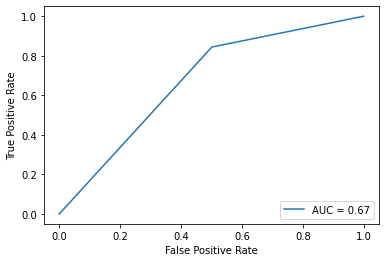

In [33]:
#AUC Score
auc_score = roc_auc_score(y_test, y_pred)
# F1 Score
F1 = f1_score(y_test, y_pred)

print('auc_score:', auc_score)
print('F1_Score:', F1)

# Creating points for ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
# Setting AUC to a variable
auc_score = metrics.auc(fpr, tpr)
# Plotting the ROC Curve and returning a visualization
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score)
display.plot()
plt.show()

Per the requirements, an ROC curve was created showcasing the AUC.  The AUC is at .67, which is a strong AUC score and suggests that the model has a good predictive nature.  If the AUC was .5 or lower, then the model would be poor performing and making random predictions.  Another performance metric looked at is F1 score.  This metric showcases the balance of Precision and Recall, in which a high balance would suggest a strong performing model.  The F1 score achieved of .76 suggest that the model is well balanced and a strong performer.  